In [5]:
#the measurement update is a Bayesian update to the prior
#based on the measurment

def update(mean1, var1, mean2, var2):
    new_mean = (var2*mean1 + var1*mean2)/(var1+var2)
    new_var = 1/(1/var2 + 1/var1)
    return new_mean, new_var


#implement motion.  If we give a control value u, predict output
#the motion update is a convolution

def predict(mean1, var1, mean2, var2):
    new_mean = mean1 + mean2
    new_var = var1 + var2
    return new_mean, new_var


measurements = [5., 6., 7., 9., 10.]
motions = [1.,1.,2.,1.,1.]
measurement_sigma = 4
motion_sigma = 2
mu = 5.
sig = 10000

for measurement, motion in zip(measurements, motions):
  #measurement update
  mu, sig = update(mu, sig, measurement, measurement_sigma)
  print("Update: ", mu,sig)
  #motion update
  mu, sig = predict(mu, sig, motion, motion_sigma) 
  print("Predict: ", mu,sig)

Update:  5.0 3.9984006397441023
Predict:  6.0 5.998400639744102
Update:  6.000000000000001 2.399744061425258
Predict:  7.000000000000001 4.399744061425258
Update:  7.000000000000001 2.0951800575117594
Predict:  9.0 4.09518005751176
Update:  9.000000000000002 2.0235152416216957
Predict:  10.000000000000002 4.023515241621696
Update:  10.000000000000002 2.0058615808441944
Predict:  11.000000000000002 4.005861580844194


In [ ]:
# Ultimately, we want to calculate the state, x, of the system

x(k) = Ax(k-1) + Bu(k-1) + w(k-1), given Z(k) = Hx(k) + v(k)  

w and k are known as process and measurment noise -- represented by Q 
process noise covariance matrix and R the measurement noise covariance matrix
A is an nxn state at the previous time step (k-1) to the state of the current state
B is an nx1 matrix relateing the option control input u to the current state
z(k) - Hx(k) is the residual or measurement innnovaton; a diff or zero means that the
estimate and the measurement are equal.  

n x m matrix K is chosen to be gain or blending factor that minimizes the 
posterior error covariance.

K(k) = P(k)H.t(HPkH.t + R)-1  = Pk * H.t/(HP(k)H.t + R
                                         )
k is discrete time

In [66]:

dt = 1.0/60
##F is state-transition model
F = np.array([[1, dt, 0], [0, 1, dt], [0, 0, 1]])
##H is obersation model [1x3]
H = np.array([1, 0, 0]).reshape(1, 3)

#Q is the process covariance (process noise)  [3x3]
Q = np.array([[0.05, 0.05, 0.0], [0.05, 0.05, 0.0], [0.0, 0.0, 0.0]])

##R is the observation covariance (observaton noise) [1,1]
R = np.array([0.5]).reshape(1, 1)

n = F.shape[1]
m = H.shape[1]

B = 0
Q = np.eye(n) 
R = np.eye(n) 
P = np.eye(n) 
x = np.zeros((n, 1))

print("n:", n, "m:", m)

testme = predict(u=0)

n: 3 m: 3


In [73]:
import numpy as np
import matplotlib.pyplot as plt

#predict is a motion step, a convolution 

def initialize():
   global B, Q, R, P, x
   B = 0
   Q = np.eye(n) 
   R = np.eye(n) 
   P = np.eye(n) 
   x = np.zeros((n, 1))
 
def predict(F, B, P, u=0):
        #dot product of F with x, B with u        
        x = np.dot(F, x) + np.dot(B, u)
        P = np.dot(np.dot(F, P), F.T) + Q
        return xx,P

#update is the measurment step, a Bayesian    
def update():
        y = z - np.dot(H, x)
        S = R + np.dot(H, np.dot(P, H.T))
        K = np.dot(np.dot(P, H.T), np.linalg.inv(S))
        x = x + np.dot(K, y)
        I = np.eye(n)
        P = np.dot(np.dot(I - np.dot(K, H), P), 
            (I - np.dot(K, H)).T) + np.dot(np.dot(K, R), K.T)

##The Kalman filter is a method to estimate the states of a system

##from the Kalman wiki

#and sometimes Bk, the control-input model, for each time-step, k, as described below.

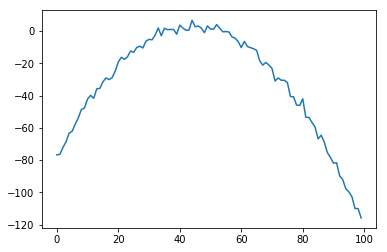

In [68]:

import numpy as np
import matplotlib.pyplot as plt

test = np.linspace(-10, 10, 100)
measurements = - (test**2 + 2*test - 2)  + np.random.normal(0, 2, 100)

plt.plot(range(len(measurements)), measurements, label = 'Measurements')
plt.show()


[[0.]
 [0.]
 [0.]]
[[0.]
 [0.]
 [0.]]
[[0.]
 [0.]
 [0.]]
[[0.]
 [0.]
 [0.]]
[[0.]
 [0.]
 [0.]]
[[0.]
 [0.]
 [0.]]
[[0.]
 [0.]
 [0.]]
[[0.]
 [0.]
 [0.]]
[[0.]
 [0.]
 [0.]]
[[0.]
 [0.]
 [0.]]
[[0.]
 [0.]
 [0.]]
[[0.]
 [0.]
 [0.]]
[[0.]
 [0.]
 [0.]]
[[0.]
 [0.]
 [0.]]
[[0.]
 [0.]
 [0.]]
[[0.]
 [0.]
 [0.]]
[[0.]
 [0.]
 [0.]]
[[0.]
 [0.]
 [0.]]
[[0.]
 [0.]
 [0.]]
[[0.]
 [0.]
 [0.]]
[[0.]
 [0.]
 [0.]]
[[0.]
 [0.]
 [0.]]
[[0.]
 [0.]
 [0.]]
[[0.]
 [0.]
 [0.]]
[[0.]
 [0.]
 [0.]]
[[0.]
 [0.]
 [0.]]
[[0.]
 [0.]
 [0.]]
[[0.]
 [0.]
 [0.]]
[[0.]
 [0.]
 [0.]]
[[0.]
 [0.]
 [0.]]
[[0.]
 [0.]
 [0.]]
[[0.]
 [0.]
 [0.]]
[[0.]
 [0.]
 [0.]]
[[0.]
 [0.]
 [0.]]
[[0.]
 [0.]
 [0.]]
[[0.]
 [0.]
 [0.]]
[[0.]
 [0.]
 [0.]]
[[0.]
 [0.]
 [0.]]
[[0.]
 [0.]
 [0.]]
[[0.]
 [0.]
 [0.]]
[[0.]
 [0.]
 [0.]]
[[0.]
 [0.]
 [0.]]
[[0.]
 [0.]
 [0.]]
[[0.]
 [0.]
 [0.]]
[[0.]
 [0.]
 [0.]]
[[0.]
 [0.]
 [0.]]
[[0.]
 [0.]
 [0.]]
[[0.]
 [0.]
 [0.]]
[[0.]
 [0.]
 [0.]]
[[0.]
 [0.]
 [0.]]
[[0.]
 [0.]
 [0.]]
[[0.]
 [0.]
 [0.]]
[[0.]
 [0.]


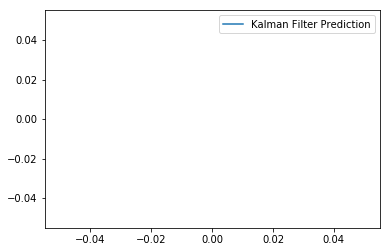

In [74]:
predictions = []

for measure in measurements:
    x,P = predict(F,B,P,u=0)
    print(x)
    #predictions.append(np.dot(H,  predict())[0])
    #print(predictions)
    #update(z)

plt.plot(range(len(predictions)), np.array(predictions), label = 'Kalman Filter Prediction')
plt.legend()
plt.show()

(3, 3)
(3, 3)
[[1.         0.01666667 0.        ]
 [0.         1.         0.01666667]
 [0.         0.         1.        ]]
[[1.05027778 0.06666667 0.        ]
 [0.06666667 1.05027778 0.01666667]
 [0.         0.01666667 1.        ]]
(3, 3)
(3, 3)
[[1.         0.01666667 0.        ]
 [0.         1.         0.01666667]
 [0.         0.         1.        ]]
[[3.89746242e-01 8.89630011e-02 2.77777778e-04]
 [8.89630011e-02 1.09824424e+00 3.33333333e-02]
 [2.77777778e-04 3.33333333e-02 1.00000000e+00]]
(3, 3)
(3, 3)
[[1.         0.01666667 0.        ]
 [0.         1.         0.01666667]
 [0.         0.         1.        ]]
[[2.70990056e-01 1.18161140e-01 7.11192092e-04]
 [1.18161140e-01 1.14073707e+00 4.99722244e-02]
 [7.11192092e-04 4.99722244e-02 9.99999913e-01]]
(3, 3)
(3, 3)
[[1.         0.01666667 0.        ]
 [0.         1.         0.01666667]
 [0.         0.         1.        ]]
[[0.22860776 0.14536149 0.00129227]
 [0.14536149 1.1745677  0.06652988]
 [0.00129227 0.06652988 0.99999926]]


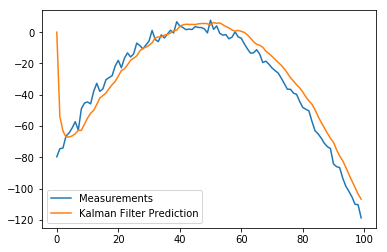

In [26]:
import numpy as np

class KalmanFilter(object):
    def __init__(self, F = None, B = None, H = None, Q = None, R = None, P = None, x0 = None):

        if(F is None or H is None):
            raise ValueError("Set proper system dynamics.")

        self.n = F.shape[1]
        self.m = H.shape[1]

        self.F = F
        self.H = H
        
        self.B = 0 if B is None else B
        self.Q = np.eye(self.n) if Q is None else Q
        self.R = np.eye(self.n) if R is None else R
        self.P = np.eye(self.n) if P is None else P
        self.x = np.zeros((self.n, 1)) if x0 is None else x0

        
    def predict(self, u = 0):
        self.x = np.dot(self.F, self.x) + np.dot(self.B, u)     
        self.P = np.dot(np.dot(self.F, self.P), self.F.T) + self.Q
        return self.x

    def update(self, z):
        y = z - np.dot(self.H, self.x)
        S = self.R + np.dot(self.H, np.dot(self.P, self.H.T))
        K = np.dot(np.dot(self.P, self.H.T), np.linalg.inv(S))
        self.x = self.x + np.dot(K, y)
        I = np.eye(self.n)
        self.P = np.dot(np.dot(I - np.dot(K, self.H), self.P), 
        	(I - np.dot(K, self.H)).T) + np.dot(np.dot(K, self.R), K.T)

        
        
        
def example():
	dt = 1.0/60
	F = np.array([[1, dt, 0], [0, 1, dt], [0, 0, 1]])
	H = np.array([1, 0, 0]).reshape(1, 3)
	Q = np.array([[0.05, 0.05, 0.0], [0.05, 0.05, 0.0], [0.0, 0.0, 0.0]])
	R = np.array([0.5]).reshape(1, 1)

	x = np.linspace(-10, 10, 100)
	measurements = - (x**2 + 2*x - 2)  + np.random.normal(0, 2, 100)


	kf = KalmanFilter(F = F, H = H, Q = Q, R = R)
    print(kf)
	predictions = []


	for z in measurements:
		predictions.append(np.dot(H,  kf.predict())[0])
		kf.update(z)

	import matplotlib.pyplot as plt
	plt.plot(range(len(measurements)), measurements, label = 'Measurements')
	plt.plot(range(len(predictions)), np.array(predictions), label = 'Kalman Filter Prediction')
	plt.legend()
	plt.show()

if __name__ == '__main__':
    example()